In [2]:
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
 

# Label encoded dataset

In [2]:
X_test = pd.read_pickle('dataset/labelenc/split/X_test.pkl')
y_test = pd.read_pickle('dataset/labelenc/split/y_test.pkl')

# Binary encoded dataset

In [3]:
X_test = pd.read_pickle('dataset/binaryenc_normalized/split/X_test.pkl')
y_test = pd.read_pickle('dataset/binaryenc_normalized/split/y_test.pkl')

In [4]:
def evaluateModel(y_pred, y_test = y_test):
    # Print the Classification Report
    cr = classification_report(y_test, y_pred)
    print("\n\nClassification Report\n")
    print(cr)

    # Print the Receiver operating characteristic Auc score
    auc_score = roc_auc_score(y_test, y_pred)
    print("\nROC AUC Score:",auc_score)

    cm = confusion_matrix(y_test, y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Evaluating Logistic Regression



Classification Report

              precision    recall  f1-score   support

           0       0.98      0.93      0.96    113962
           1       0.22      0.55      0.31      4131

    accuracy                           0.92    118093
   macro avg       0.60      0.74      0.63    118093
weighted avg       0.96      0.92      0.93    118093


ROC AUC Score: 0.7392155261137618


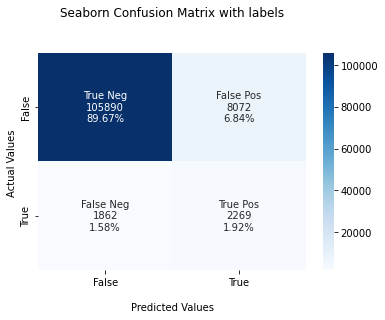

In [17]:
model=pickle.load(open('Models/LogisticRegressionModel.p','rb'))

y_pred = model.predict(X_test)

evaluateModel(y_pred)

# Evaluating Neural Network

3691/3691 [==============================] - 3s 844us/step


Classification Report

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    113962
           1       0.29      0.66      0.40      4131

    accuracy                           0.93    118093
   macro avg       0.64      0.80      0.68    118093
weighted avg       0.96      0.93      0.94    118093


ROC AUC Score: 0.8001023752174549


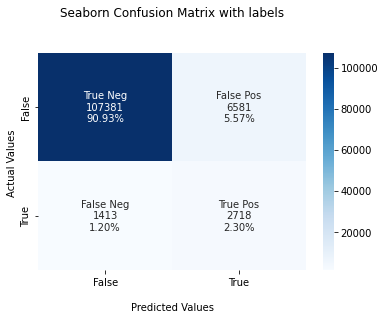

In [18]:
model = keras.models.load_model('Models/NeuralNetworkModel')

y_pred = model.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

evaluateModel(y_pred)

# Evaluating LGB Model



Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    113962
           1       0.74      0.52      0.61      4131

    accuracy                           0.98    118093
   macro avg       0.86      0.75      0.80    118093
weighted avg       0.97      0.98      0.97    118093


ROC AUC Score: 0.7548442646803607


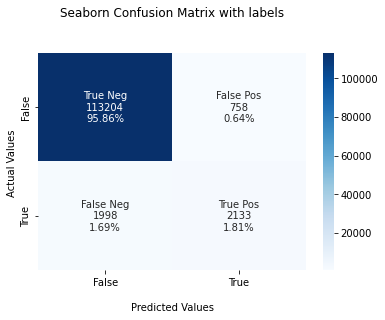

In [7]:
model=pickle.load(open('Models/LGBModel.p','rb'))

y_pred = model.predict(X_test)
evaluateModel(y_pred)

# Evaluating Random Forest

C:\Users\judyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\judyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(




Classification Report

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    113962
           1       0.41      0.48      0.44      4131

    accuracy                           0.96    118093
   macro avg       0.69      0.73      0.71    118093
weighted avg       0.96      0.96      0.96    118093


ROC AUC Score: 0.7287723178214082


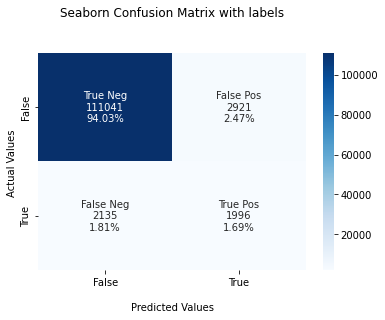

In [11]:
model=pickle.load(open('Models/RandomForest.p','rb'))

y_pred = model.predict(X_test)
evaluateModel(y_pred)

# Evaluating Xgboost



Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    113962
           1       0.95      0.65      0.77      4131

    accuracy                           0.99    118093
   macro avg       0.97      0.82      0.88    118093
weighted avg       0.99      0.99      0.99    118093


ROC AUC Score: 0.8244974156788816


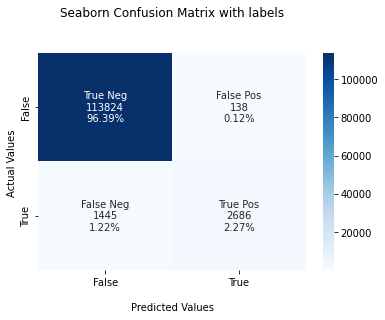

In [5]:
model=pickle.load(open('Models/xgboostModel.p','rb'))

y_pred = model.predict(X_test)
evaluateModel(y_pred)

# Evaluating SVM Model

In [5]:
model=pickle.load(open('Models/svmModel.p','rb'))

# y_pred = model.predict(X_test)
# evaluateModel(y_pred)

C:\Users\judyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.1.1 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\judyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.1 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
